In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
samples = pd.read_csv('data_final/merged_all_final.csv')

In [3]:
samples.head()

,Country,Region,iso_a3,wh_score,gdi,gii,efs,pdn,year
0,Albania,Southern Europe,ALB,4.655,0.970,0.256,65.650034,105.135146,2015
1,Algeria,Northern Africa,DZA,6.355,0.858,0.442,48.881858,16.680253,2015
2,Angola,Sub-Saharan Africa,AGO,3.866,0.838,0.575,47.885804,22.366552,2015
3,Armenia,Western Asia,ARM,4.360,0.977,0.301,67.125092,102.759150,2015
4,Australia,Australia and New Zealand,AUS,7.313,0.975,0.110,81.387287,3.100113,2015


In [4]:
features = samples[['wh_score','gdi','gii','efs','pdn']]

In [5]:
features

,wh_score,gdi,gii,efs,pdn
0,4.6550,0.970,0.256,65.650034,105.135146
1,6.3550,0.858,0.442,48.881858,16.680253
2,3.8660,0.838,0.575,47.885804,22.366552
3,4.3600,0.977,0.301,67.125092,102.759150
4,7.3130,0.975,0.110,81.387287,3.100113
...,...,...,...,...,...
543,6.1741,0.939,0.303,51.500000,77.469205
544,4.7066,1.013,0.458,25.200000,32.730792
545,5.1753,1.003,0.314,53.100000,308.125246
546,4.1066,0.948,0.540,54.300000,23.341479


### Collinearity

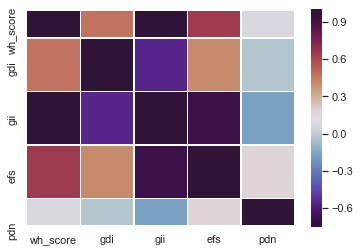

In [6]:
sns.heatmap(features.corr(method='spearman'), square=True, linewidths=.5, cmap='twilight_shifted')

In [7]:
samples.corr(method='spearman')

,wh_score,gdi,gii,efs,pdn,year
wh_score,1.000000,0.479163,-0.750513,0.651990,0.074219,0.011262
gdi,0.479163,1.000000,-0.546404,0.416461,-0.021566,0.002481
gii,-0.750513,-0.546404,1.000000,-0.686370,-0.167180,-0.026701
efs,0.651990,0.416461,-0.686370,1.000000,0.175313,0.016082
pdn,0.074219,-0.021566,-0.167180,0.175313,1.000000,0.016688
year,0.011262,0.002481,-0.026701,0.016082,0.016688,1.000000


In [8]:
def leastsquares(x,y):
    # Compute slope and intercept
    slope, intercept = np.polyfit(x, y, 1)
    # Print slope and intercept
    print("Slope:", slope)
    print("Intercept:", intercept)

In [9]:
def spearman_r(x, y):
    # Compute correlation matrix
    r, p = stats.spearmanr(x, y)

    # Return entry [0,1]
    return r

In [10]:
def corr_p_value(x, y, label, boolean='greater', n=10000):
    """Simulates the hypothesis that x and y are totally independent of each other 
    by permuting the x values but leaving the y values fixed"""
    # Compute observed correlation
    corr_obs = spearman_r(x, y)

    # Initialize permutation replicates
    perm_replicates = np.empty(n)

    # Draw replicates
    for i in range(n):
        # Permute x measurments
        permuted = np.random.permutation(x)

        # Compute Pearson correlation
        perm_replicates[i] = spearman_r(permuted, y)

    # Compute p-value
    if boolean == 'less':
        p = np.sum(perm_replicates <= corr_obs) / len(perm_replicates)
    else:
       p = np.sum(perm_replicates >= corr_obs) / len(perm_replicates) 
    
    print('p-val =', p)
    
    # Plot sample correlation coefficients 
    plt.hist(perm_replicates, bins=20)
    plt.xlabel(label + ' Correlation Coefficients')
    plt.ylabel('# of corr_cof')
    plt.title('Distribution of Spearman correlation coefficients')
    plt.axvline(corr_obs, color='r', linestyle='--')

## World Happiness / Gender Development  

##### H<sub>0</sub> : There is NO correlation between World Happiness and Gender Development
##### H<sub>a</sub> : There IS a correlation between World Happiness and Gender Development

Slope: 5.67360139318834
Intercept: 0.12872670152528262


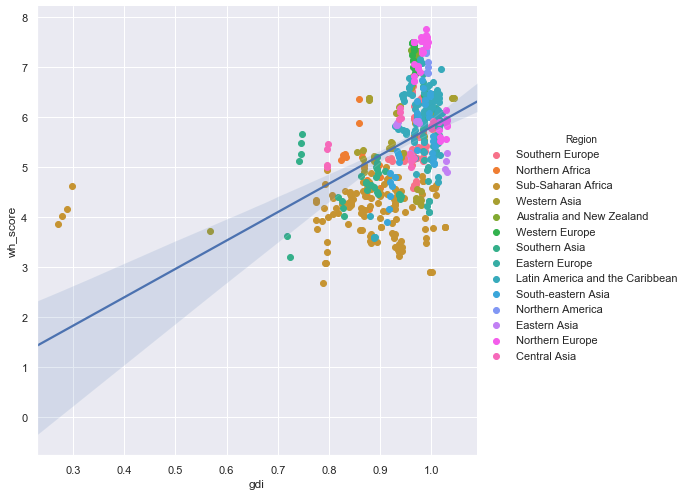

In [11]:
sns.FacetGrid(samples, hue="Region", height=7).map(plt.scatter, "gdi","wh_score").add_legend()
sns.regplot(x="gdi", y="wh_score", data=samples, scatter=False)

leastsquares(samples['gdi'],samples['wh_score'])

#### Hypothesis Test on Spearman correlation

p-val = 0.0


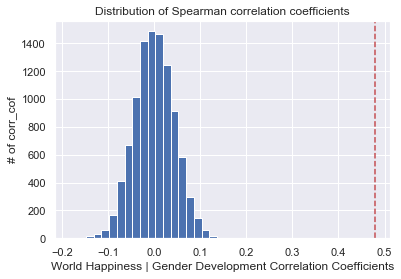

In [12]:
corr_p_value(samples['gdi'],samples['wh_score'], 'World Happiness | Gender Development')

## World Happiness / Gender Inequality

#### H<sub>0</sub> : There is NO correlation between World Happiness and Gender Inequality   
#### H<sub>a</sub> : There IS a correlation between World Happiness and Gender Inequality

Slope: -4.312880938166822
Intercept: 6.939818705042549


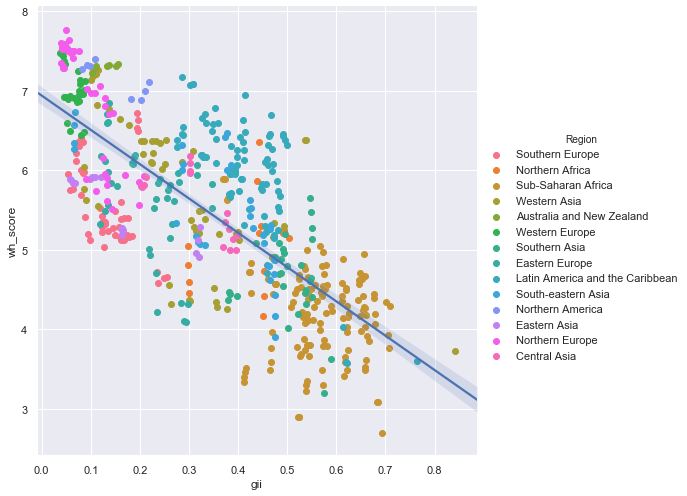

In [13]:
sns.FacetGrid(samples, hue="Region", height=7).map(plt.scatter, "gii","wh_score").add_legend()
sns.regplot(x="gii", y="wh_score", data=samples, scatter=False)

leastsquares(samples['gii'],samples['wh_score'])

#### Hypothesis Test on Spearman correlation

p-val = 1.0


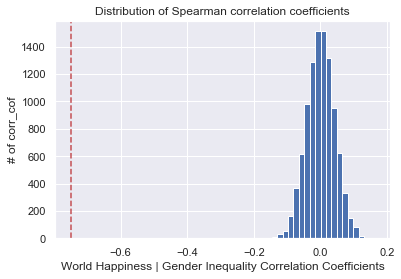

In [14]:
corr_p_value(samples['gii'],samples['wh_score'], 'World Happiness | Gender Inequality')

## World Happiness / Economic Freedom

#### H<sub>0</sub> : There is NO correlation between World Happiness and Economic Freedom   
#### H<sub>a</sub> : There IS a correlation between World Happiness and Economic Freedom

Slope: 0.07159754778975101
Intercept: 1.009730796254963


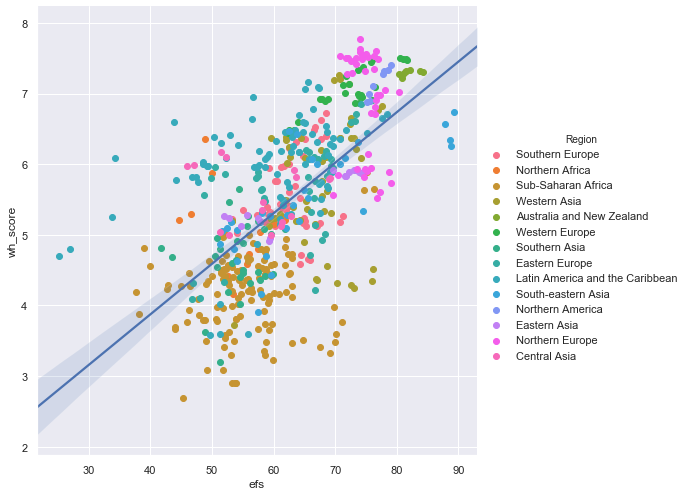

In [15]:
sns.FacetGrid(samples, hue="Region", height=7).map(plt.scatter, "efs","wh_score").add_legend()
sns.regplot(x="efs", y="wh_score", data=samples, scatter=False)

leastsquares(samples['efs'],samples['wh_score'])

#### Hypothesis Test on Spearman correlation

p-val = 0.0


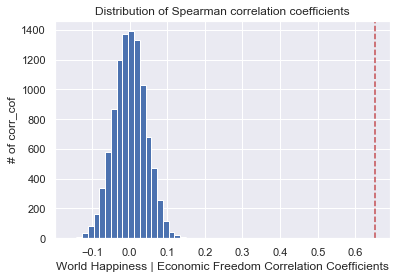

In [16]:
corr_p_value(samples['efs'],samples['wh_score'], 'World Happiness | Economic Freedom')

## Markdown World Happiness / Population Density

#### H<sub>0</sub> : There is NO correlation between World Happiness and Population Density  
#### H<sub>a</sub> : There IS a correlation between World Happiness and Population Density

Slope: 0.00014964643856335284
Intercept: 5.4315451729257465


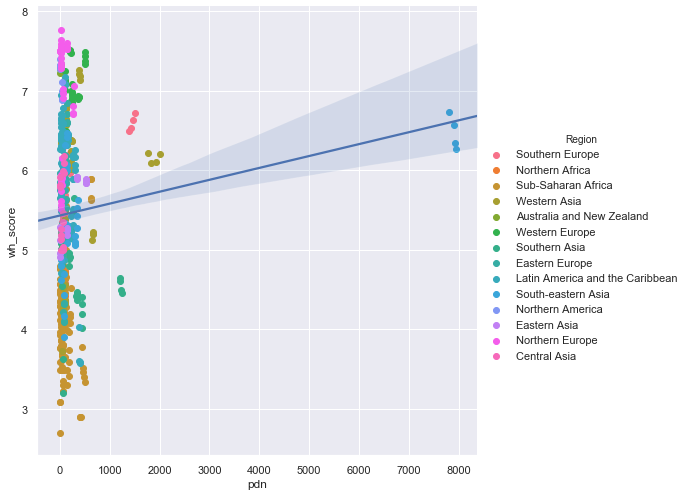

In [17]:
sns.FacetGrid(samples, hue="Region", height=7).map(plt.scatter, "pdn","wh_score").add_legend()
sns.regplot(x="pdn", y="wh_score", data=samples, scatter=False)

leastsquares(samples['pdn'],samples['wh_score'])

#### Hypothesis Test on Spearman correlation

p-val = 0.0404


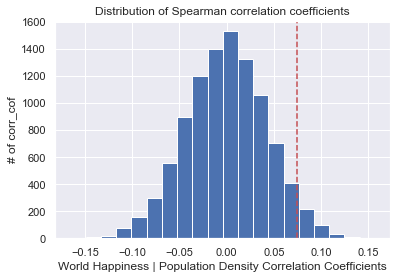

In [18]:
corr_p_value(samples['pdn'],samples['wh_score'], 'World Happiness | Population Density')